In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from spicy import stats

In [2]:
x=pd.read_csv('SampleSuperstore.csv')

In [3]:
x.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
x.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [5]:
x.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


<h3>Checking for Missing Data

In [6]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
nan_values = x.isnull().values.any()

# Check for hyphens
hyphen_values = (x == '-').values.any()

# Check for underscores
underscore_values = (x == '_').values.any()

# Check for other forms of null values
other_null_values = x[x.isin(['null', 'na', 'missing'])].values.any()

# Print the results
print("NaN values found:", nan_values)
print("Hyphen values found:", hyphen_values)
print("Underscore values found:", underscore_values)
print("Other null values found:", other_null_values)

NaN values found: False
Hyphen values found: False
Underscore values found: False
Other null values found: nan


<h3>Checking data types

In [10]:
x.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

<h3> calculating price per item

In [11]:
x["price_per_unit"]=x['Sales']/x['Quantity']
x.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,price_per_unit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,130.9800
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,243.9800
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,7.3100
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,191.5155
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.1840


<h3>splitting the price per item into 3 bins(low,medium,high) of the same size

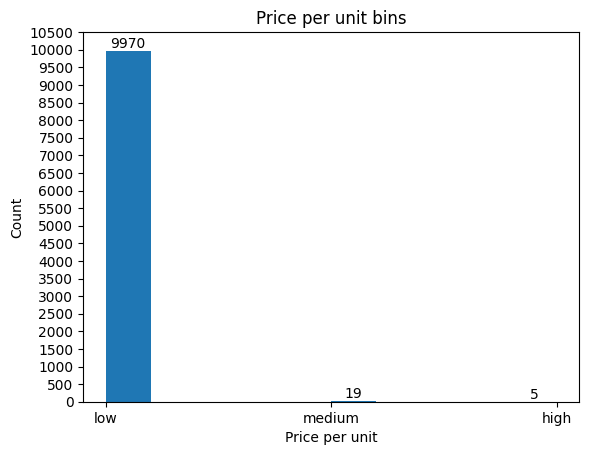

In [12]:
bins = np.linspace(min(x["price_per_unit"]), max(x["price_per_unit"]), 4)
Sales_groups = ["low", "medium", "high"]
Sales_Category = pd.cut(x["price_per_unit"], bins, labels=Sales_groups, include_lowest=True)

plt.hist(Sales_Category)

plt.ylim(0, 5000)
plt.yticks(np.arange(0, 11000, 500))

plt.xlabel("Price per unit")
plt.ylabel("Count")
plt.title("Price per unit bins")

# Add count labels to each bar
for rect in plt.gca().patches:
    height = rect.get_height()
    if height > 0:
        plt.gca().text(rect.get_x() + rect.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.show()


From this histogram we observe that most of the items consist of low prices except a very few items which have belong to medium and high prices.




.

<h3>Finding all rows that fall in the category medium or high

In [14]:
#creating a dataframe consisting of entries belonging to medium and high prices_per_unit.
df2=x.loc[x["price_per_unit"]>=1.25791733e+03]
df2.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,price_per_unit
318,Standard Class,Home Office,United States,New York City,New York,10024,East,Technology,Machines,3991.980,2,0.0,1995.9900,1995.990
509,Standard Class,Consumer,United States,Atlanta,Georgia,30318,South,Office Supplies,Binders,6354.950,5,0.0,3177.4750,1270.990
683,Same Day,Corporate,United States,Burlington,North Carolina,27217,South,Technology,Machines,7999.980,4,0.5,-3839.9904,1999.995
977,First Class,Corporate,United States,Detroit,Michigan,48205,Central,Technology,Machines,3059.982,2,0.1,679.9960,1529.991
2505,Second Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Supplies,8187.650,5,0.0,327.5060,1637.530


In [15]:
df2.describe()

,Postal Code,Sales,Quantity,Discount,Profit,price_per_unit
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,43686.041667,7690.879917,3.750000,0.095833,1952.092300,1984.624167
std,31464.201046,4926.787467,1.421879,0.162799,2605.168538,822.172013
min,8701.000000,1270.990000,1.000000,0.000000,-3839.990400,1270.990000
25%,19563.250000,4399.977000,3.000000,0.000000,566.620950,1307.515500
50%,31267.000000,6677.455000,4.000000,0.000000,1775.388150,1693.760000
75%,61221.250000,9187.435000,5.000000,0.200000,2894.356750,2174.993500
max,98115.000000,22638.480000,7.000000,0.500000,8399.976000,3773.080000


In [ ]:
#unique categories of items in the dataset vs the unique items in medium and high price_per_unit range.
print(x["Category"].unique())
print(df2["Category"].unique())

['Furniture' 'Office Supplies' 'Technology']
['Technology' 'Office Supplies']


No furniture is available in the medium and high price_per_unit range.  
We can conclude that no furniture is sold at high prices.

In [ ]:
print(x["Sub-Category"].unique())
print(df2["Sub-Category"].unique())

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
['Machines' 'Binders' 'Supplies' 'Copiers']


Hence we can conclude that only machines,binders,supplies,copiers are available at medium and high prices.  

In [ ]:
df0=x.loc[x["price_per_unit"]<1.25791733e+03]
print(df0["Sub-Category"].unique())

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


This proves that all items are available at low prices.

<Axes: xlabel='Sub-Category'>

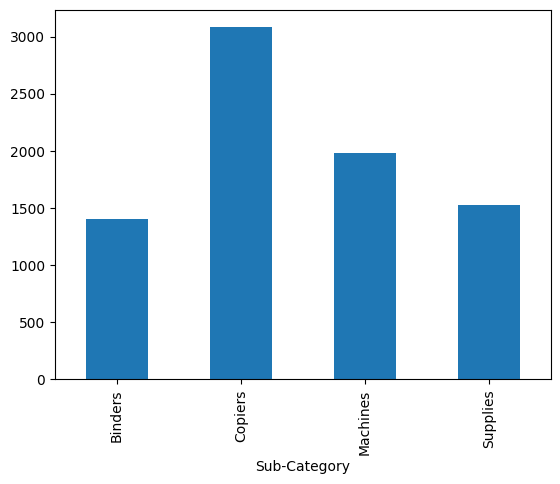

In [ ]:
df2.groupby("Sub-Category")["price_per_unit"].mean().plot.bar()

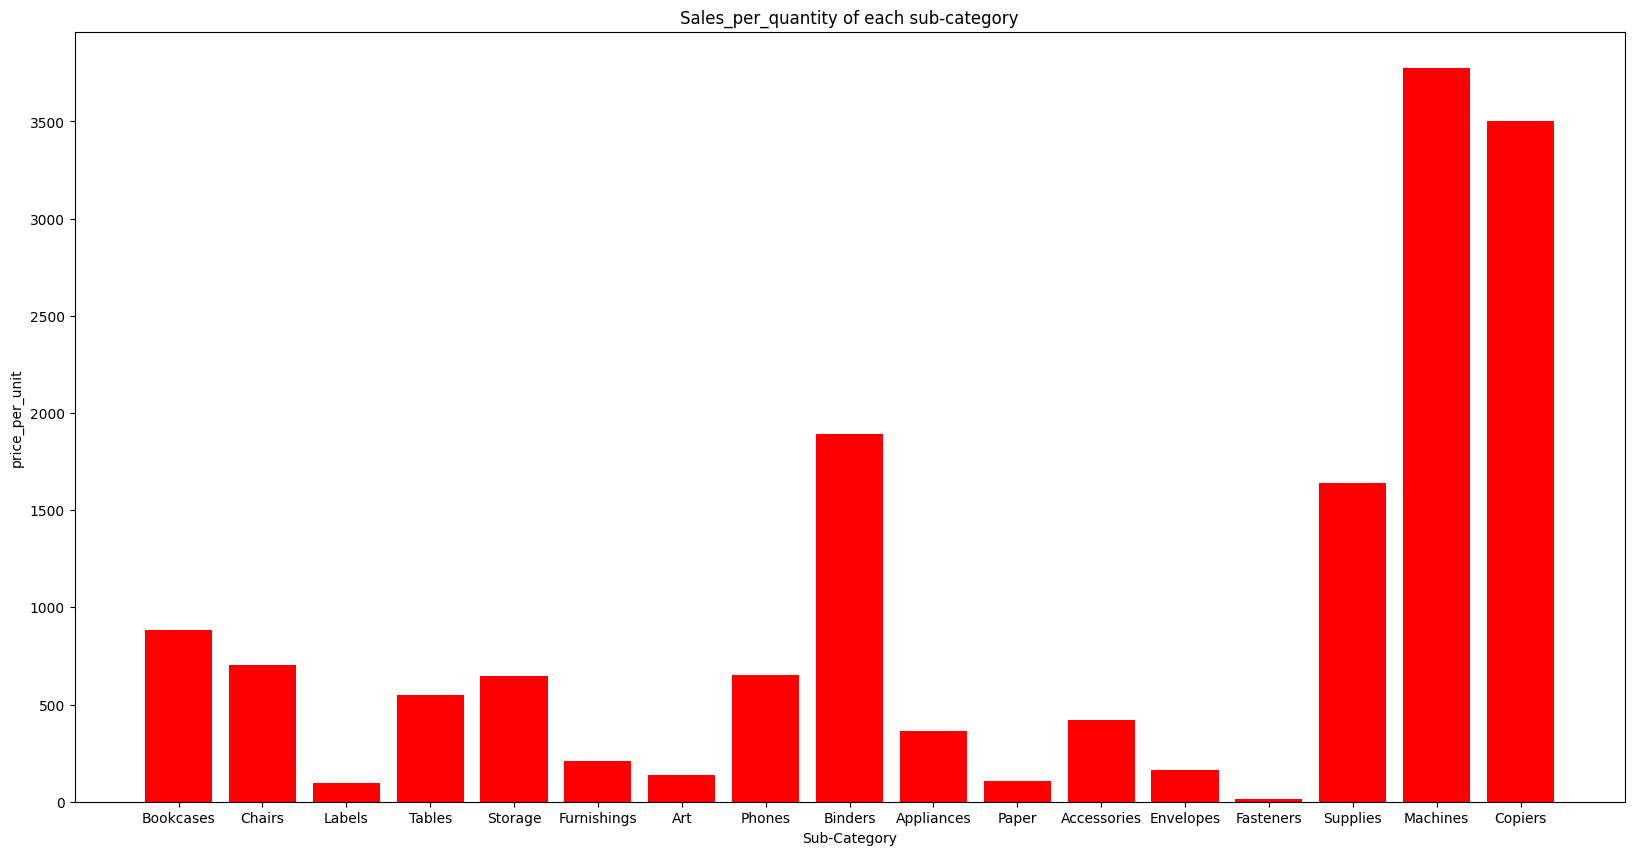

In [ ]:
#Bar graph plot for cost of each sub category
plt.figure(figsize=(20,10))
plt.bar(x["Sub-Category"],x["price_per_unit"],color="red")
plt.xlabel("Sub-Category")
plt.ylabel("price_per_unit")
plt.title("Sales_per_quantity of each sub-category")
plt.show()

<h3> Checking relation between profits obtained and discounts given


In [ ]:
#making a new dataframe consisting of the columns Discount,Profit,Sales_per_unit
df3=x[["Discount","Profit","price_per_unit"]]
df3.head()

,Discount,Profit,price_per_unit
0,0.00,41.9136,130.9800
1,0.00,219.5820,243.9800
2,0.00,6.8714,7.3100
3,0.45,-383.0310,191.5155
4,0.20,2.5164,11.1840


In [ ]:
#making a new dataframe consisting of only entries that have suffered losses
df4=df3.loc[df3["Profit"]<0]
df4
df4.sort_values("Discount")

,Discount,Profit,price_per_unit
9581,0.10,-6.5490,117.882
4645,0.10,-8.0980,72.882
6439,0.10,-6.5490,117.882
5827,0.10,-8.0784,90.882
5079,0.15,-29.6058,119.833
...,...,...,...
7786,0.80,-4.7685,2.890
2527,0.80,-16.8840,1.608
7781,0.80,-14.5656,2.856
8874,0.80,-32.9850,4.398


In [ ]:
#max and min discount of the dataframe containing all losses
print(max(df4["Discount"]))
print(min(df4["Discount"]))

0.8
0.1


From this we can conclude that everyone who has suffered losses has given a discount of atleast 0.1

Therefore we can say that providing no discounts will not lead to losses.

<Axes: title={'center': 'discount given for losses encountered'}, xlabel='Discount'>

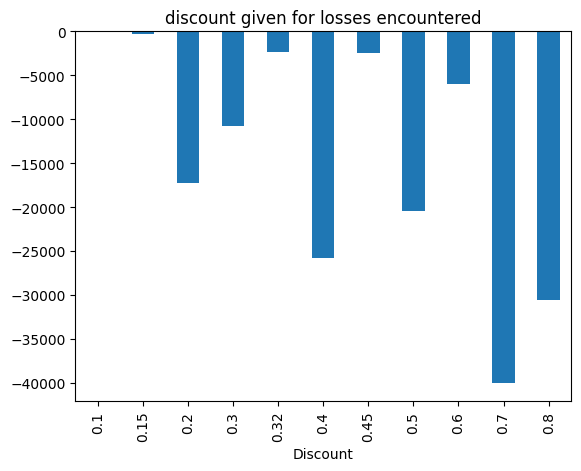

In [ ]:
df4.groupby("Discount")["Profit"].sum().plot.bar(title="discount given for losses encountered")

<h3> We check the discounts given based on the state

<Axes: title={'center': 'average discount given in each state'}, xlabel='State'>

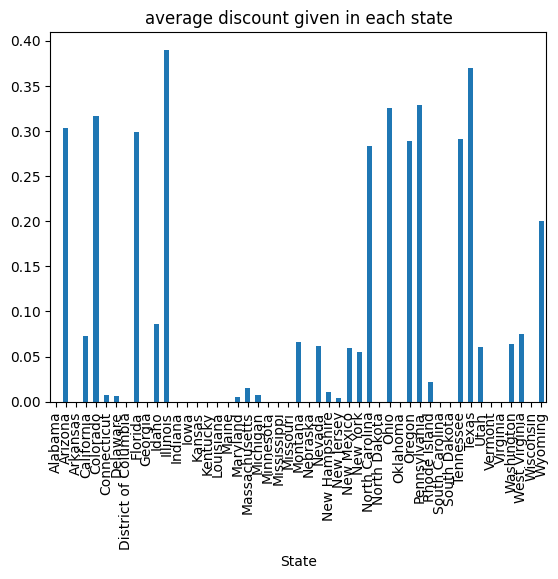

In [21]:
#plot averge discount given in each state
x.groupby("State")["Discount"].mean().plot.bar(title="average discount given in each state")

(0.0, 2.2031201017695436)

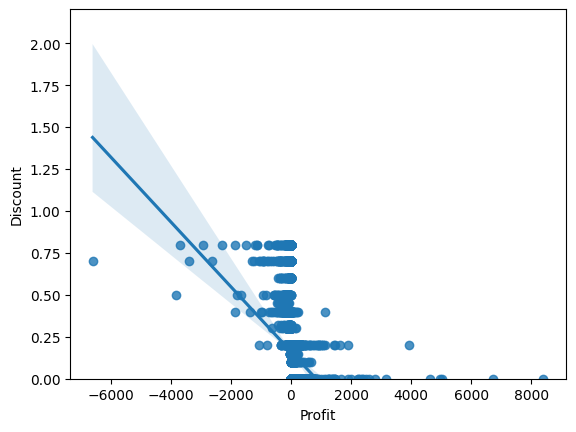

In [ ]:
sns.regplot(x="Profit",y="Discount",data=x)
plt.ylim(0,)

</h3> Building Predictive Models


In [58]:
from sklearn.linear_model import LinearRegression
k=x[["Sales","Discount","price_per_unit"]]
l=x["Profit"]
X=[[500,0.5,50]]
lm=LinearRegression()
lm.fit(k,l)
o=lm.predict(X)

print("linear regression accuracy is:",lm.score(k,l))
print("profit=",o)

#using polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
pr = PolynomialFeatures(degree=2)
k_pr = pr.fit_transform(k)
lm = LinearRegression()
lm.fit(k_pr, l)
X_pr = pr.transform(X)
p = lm.predict(X_pr)
accuracy = lm.score(k_pr, l)
print("Polynomial regression accuracy is:", accuracy)


print("profit=",p)

linear regression accuracy is: 0.27987326535017054
profit= [-24.1669145]
Polynomial regression accuracy is: 0.7966518178907734
profit= [-219.68241325]


c:\Users\vinee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\vinee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
